### 순환 신경망으로 IMDB 리뷰 분류하기

## IMDB 리뷰 데이터셋

In [3]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

17464789/17464789 [==============================] - 1s 0us/step


In [4]:
#train_input과 test_input 데이터의 shape 출력하기
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [5]:
#첫번째 리뷰의 길이 출력해보기
print(len(train_input[0]))

218


In [6]:
#첫번째 리뷰에 담긴 내용 출력해보기
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
#훈련세트의 20%를 검증 세트로 떼어놓기, 이때 랜덤 시드는 42
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42
)

In [9]:
#리뷰 길이의 평균과 중간값을 구해보기
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


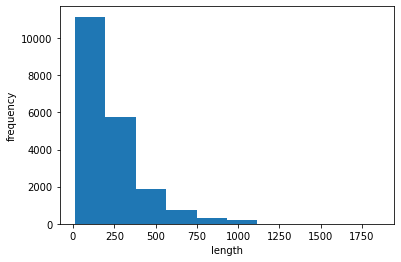

In [10]:
#lengths 배열을 히스토그램으로 표현하기
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
#train_input의 길이를 100으로 맞추어 보기, 길이를 맞춘 데이터들은 train_seq 변수 명에 저장하기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

(?) train_input의 길이를 100으로 맞추는 이유가 무엇일까요?

-> 대부분의 리뷰 길이가 0 ~ 250 사이에 있고, 중간값은 178이기 때문에

In [12]:
#train_seq에 있는 첫 번째 샘플을 출력하기
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


(?) 해당 샘플을 출력해본 결과 원래 샘플의 모습을 짐작해볼 수 있나요?

0 으로 패딩된 값이 없기 때문에 100자보다 긴 리뷰였을 것

In [13]:
#train_input에 있는 원본 샘플의 끝 확인하기
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


(?) 샘플의 끝이 잘렸나요, 앞이 잘렸나요? 그렇게 판단한 이유는 무엇인가요?

-> 앞이 잘렸음, train_input[0]의 마지막 10개의 토큰이 train_seq[0] 의 출력값과 일치하기 때문

In [14]:
#검증 세트의 길이도 100으로 맞추기, 길이를 맞춘 데이터는 val_seq 변수명에 저장하기
val_seq = pad_sequences(val_input, maxlen = 100)

### 순환 신경망 만들기

In [17]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [18]:
#train_seq를 원-핫 인코딩으로 변환하여 train_oh 배열로 만들기
train_oh = keras.utils.to_categorical(train_seq)

(?) 원-핫 인코딩이 무엇인가요? (바로 답이 떠오르지 않는 분들은 해당 개념에 대한 문서화 작업을 통해 개념을 확실히 해요!)

0으로 이루어진 벡터에 단 한개의 1의 값으로 해당 데이터의 값 구별

In [19]:
#train_oh의 첫번째 샘플의 첫번째 토큰 10이 잘 인코딩 되었는 지 출력하기
print(train_oh[0][0][:12])
# 토큰 10이 잘 인코딩된 것인지 확인하기
print(np.sum(train_oh[0][0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [20]:
#val_seq도 원-핫 인코딩으로 바꾸고, 그 결과는 val_oh 변수명에 저장하기
val_oh = keras.utils.to_categorical(val_seq)

In [21]:
# 앞서 만든 모델의 구조 출력하기
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


### 순환 신경망 훈련하기

In [23]:
#기본 RMSprop이 아닌 별도의 RMSprop 객체를 만들어 학습률을 0.0001로 지정하기.
#에포크 횟수는 100으로 늘리고 배치 크기는 64개로 설정
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_oh, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 45ms/step - loss: 0.6958 - accuracy: 0.5100 - val_loss: 0.6973 - val_accuracy: 0.4990
Epoch 2/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6922 - accuracy: 0.5236 - val_loss: 0.6943 - val_accuracy: 0.5096
Epoch 3/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6892 - accuracy: 0.5342 - val_loss: 0.6914 - val_accuracy: 0.5218
Epoch 4/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6862 - accuracy: 0.5487 - val_loss: 0.6882 - val_accuracy: 0.5356
Epoch 5/100
313/313 [==============================] - 18s 59ms/step - loss: 0.6816 - accuracy: 0.5713 - val_loss: 0.6812 - val_accuracy: 0.5666
Epoch 6/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6657 - accuracy: 0.6198 - val_loss: 0.6614 - val_accuracy: 0.6250
Epoch 7/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6490 - accuracy: 0.6477 - val_loss: 0.6541 - val_ac

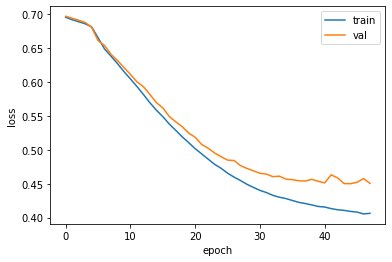

In [25]:
#훈련 손실과 검증 손실을 그래프로 그려 훈련 과정 살펴보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


### 단어 임베딩을 사용하기

In [27]:
#Embedding 클래스를 SimpleRNN 층 앞에 추가한 두 번째 순환 신경망 만들기
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
               metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only = True)
earaly_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 23ms/step - loss: 0.6970 - accuracy: 0.4967 - val_loss: 0.6943 - val_accuracy: 0.5106
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6921 - accuracy: 0.5186 - val_loss: 0.6925 - val_accuracy: 0.5186
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6881 - accuracy: 0.5403 - val_loss: 0.6906 - val_accuracy: 0.5318
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6841 - accuracy: 0.5610 - val_loss: 0.6884 - val_accuracy: 0.5386
Epoch 5/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6797 - accuracy: 0.5775 - val_loss: 0.6866 - val_accuracy: 0.5490
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6748 - accuracy: 0.5907 - val_loss: 0.6852 - val_accuracy: 0.5534
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6699 - accuracy: 0.6018 - val_loss: 0.6834 - val_accuracy:

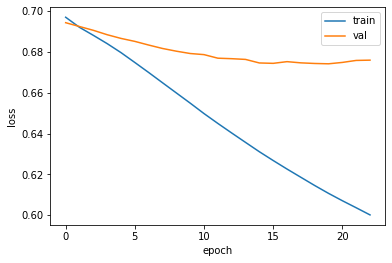

In [30]:
#훈련 손실과 검증 손실을 그래프로 출력해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()